In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [4]:
NUM_CLASSES = 10

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
56/56 [==============================] - 1s 9ms/step - loss: 2.2003 - accuracy: 0.1850 - val_loss: 2.0671 - val_accuracy: 0.2943

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
56/56 [==============================] - 0s 4ms/step - loss: 2.0264 - accuracy: 0.2528 - val_loss: 1.8772 - val_accuracy: 0.4156

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
56/56 [==============================] - 0s 3ms/step - loss: 1.8997 - accuracy: 0.3156 - val_loss: 1.7171 - val_accuracy: 0.4423

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
56/56 [==============================] - 0s 4ms/step - loss: 1.7842 - accuracy: 0.3448 - val_loss: 1.5693 - val_accuracy: 0.4947

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
56/56 [==============================] - 0s 4ms/step - loss: 1.7051 - accuracy: 0.3625 - val_lo


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
56/56 [==============================] - 0s 4ms/step - loss: 1.0352 - accuracy: 0.6347 - val_loss: 0.5820 - val_accuracy: 0.8799

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
56/56 [==============================] - 0s 4ms/step - loss: 1.0218 - accuracy: 0.6492 - val_loss: 0.5759 - val_accuracy: 0.8786

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
56/56 [==============================] - 0s 4ms/step - loss: 1.0206 - accuracy: 0.6461 - val_loss: 0.5725 - val_accuracy: 0.8799

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
56/56 [==============================] - 0s 4ms/step - loss: 1.0060 - accuracy: 0.6495 - val_loss: 0.5596 - val_accuracy: 0.8905

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
56/56 [==

56/56 [==============================] - 0s 4ms/step - loss: 0.9385 - accuracy: 0.6716 - val_loss: 0.4260 - val_accuracy: 0.9070

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.9246 - accuracy: 0.6734 - val_loss: 0.4302 - val_accuracy: 0.9006

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8991 - accuracy: 0.6857 - val_loss: 0.4366 - val_accuracy: 0.9040

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.9173 - accuracy: 0.6796 - val_loss: 0.4111 - val_accuracy: 0.9125

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8956 - accuracy: 0.6899 - val_loss: 0.430


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
56/56 [==============================] - 0s 3ms/step - loss: 0.8894 - accuracy: 0.6901 - val_loss: 0.3814 - val_accuracy: 0.9180

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8534 - accuracy: 0.7033 - val_loss: 0.3879 - val_accuracy: 0.9116

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8716 - accuracy: 0.6999 - val_loss: 0.3762 - val_accuracy: 0.9167

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8669 - accuracy: 0.6920 - val_loss: 0.3913 - val_accuracy: 0.9104

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
56/5

56/56 [==============================] - 0s 3ms/step - loss: 0.8574 - accuracy: 0.7069 - val_loss: 0.3737 - val_accuracy: 0.9036

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8434 - accuracy: 0.7111 - val_loss: 0.3648 - val_accuracy: 0.9205

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8425 - accuracy: 0.7042 - val_loss: 0.3649 - val_accuracy: 0.9066

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8469 - accuracy: 0.7033 - val_loss: 0.3732 - val_accuracy: 0.9159

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8512 - accuracy: 0.7046 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 184/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8096 - accuracy: 0.7174 - val_loss: 0.3619 - val_accuracy: 0.9036

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
56/56 [==============================] - 0s 3ms/step - loss: 0.8121 - accuracy: 0.7186 - val_loss: 0.3556 - val_accuracy: 0.9053

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
56/56 [==============================] - 0s 3ms/step - loss: 0.8217 - accuracy: 0.7133 - val_loss: 0.3563 - val_accuracy: 0.9053

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
56/56 [==============================] - 0s 3ms/step - loss: 0.8261 - accuracy: 0.7183 - val_loss: 0.3638 - val_accuracy: 0.8956

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
56/5

56/56 [==============================] - 0s 4ms/step - loss: 0.8045 - accuracy: 0.7180 - val_loss: 0.3432 - val_accuracy: 0.9044

Epoch 00220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 221/1000
56/56 [==============================] - 0s 3ms/step - loss: 0.8094 - accuracy: 0.7262 - val_loss: 0.3463 - val_accuracy: 0.9074

Epoch 00221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 222/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.8065 - accuracy: 0.7243 - val_loss: 0.3471 - val_accuracy: 0.9095

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.7798 - accuracy: 0.7352 - val_loss: 0.3545 - val_accuracy: 0.9011

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.7890 - accuracy: 0.7260 - val_loss: 0

In [14]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.9146


In [15]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [16]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.9954063e-01 2.0368706e-01 5.9658927e-01 1.8166880e-04 2.3642691e-07
 2.0957018e-14 1.2571050e-16 0.0000000e+00 1.1440980e-06 1.2261777e-12]
2


# 混同行列

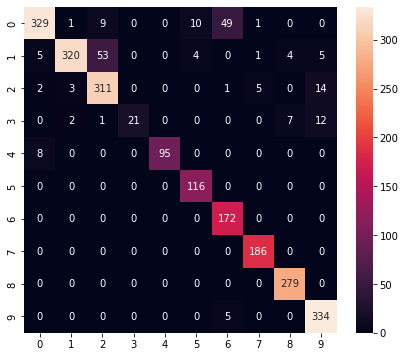

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       399
           1       0.98      0.82      0.89       392
           2       0.83      0.93      0.88       336
           3       1.00      0.49      0.66        43
           4       1.00      0.92      0.96       103
           5       0.89      1.00      0.94       116
           6       0.76      1.00      0.86       172
           7       0.96      1.00      0.98       186
           8       0.96      1.00      0.98       279
           9       0.92      0.99      0.95       339

    accuracy                           0.91      2365
   macro avg       0.93      0.90      0.90      2365
weighted avg       0.92      0.91      0.91      2365



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [18]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [19]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jon\AppData\Local\Temp\tmpyn117h6z\assets


6608

# 推論テスト

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.7 ms


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.9954041e-01 2.0368743e-01 5.9658915e-01 1.8166892e-04 2.3642774e-07
 2.0957133e-14 1.2571144e-16 0.0000000e+00 1.1440989e-06 1.2261796e-12]
2
